Ejercicios: Optimización:2

In [ ]:
import sympy as sp

x, y,z = sp.symbols('x y z')

f = x**2+y**2+z**2-2*z+1

g = 2*x -4*y +5*z-2

grad_f = [sp.diff(f, var) for var in (x, y,z)]
grad_g = [sp.diff(g, var) for var in (x, y,z)]
lambda_ = sp.symbols('lambda')

L = sp.Matrix(grad_f) - lambda_ * sp.Matrix(grad_g)

N = sp.Matrix([[2*x -4*y +5*z-2]])

L = L.row_insert(L.rows, N) 

tes=sp.solve(L, [x, y, z,lambda_])



w = tes[x]**2+ tes[y]**2+tes[z]**2-2*tes[z]+1


print(w)


Optimización:3

In [3]:
from scipy.optimize import minimize

def volume(x):
    return -x[0]*x[1]*x[2]

def surface_area(x):
    return x[0]*x[1] + 2*x[1]*x[2] + 2*x[0]*x[2] - 12

cons = ({'type': 'eq', 'fun': surface_area})
bnds = ((0, None), (0, None), (0, None))

result = minimize(volume, [1,1,1], bounds=bnds, constraints=cons)

print("Las dimensiones de la caja que maximizan el volumen son: ", result.x)
print("El volumen máximo de la caja es: ", -result.fun)


Las dimensiones de la caja que maximizan el volumen son:  [1.99999998 1.99999996 1.00000013]
El volumen máximo de la caja es:  4.000000393330544


Ejercicios: Generales de probabilidad:4

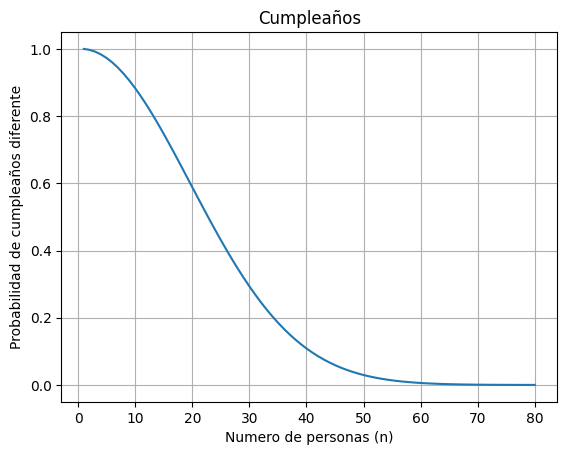

In [5]:
import matplotlib.pyplot as plt

def cumple(n):
    p = 1.0
    for i in range(n):
        p *= (365 - i) / 365
    return p

x = list(range(1, 81))
y = [cumple(n) for n in x]

plt.plot(x, y)
plt.xlabel('Numero de personas (n)')
plt.ylabel('Probabilidad de cumpleaños diferente')
plt.title('Cumpleaños')
plt.grid(True)
plt.show()


Ejercicios: Generales de probabilidad:8

In [17]:
import numpy as np

num_lanzamientos = 4
num_experimentos = 10**5

resultados = [+1, -1]

experimentos = np.random.choice(resultados, size=(num_experimentos, num_lanzamientos))

sumas = np.sum(experimentos, axis=1)

num_exitos = np.count_nonzero(sumas == 0)

probabilidad = num_exitos / num_experimentos

print(f'La probabilidad de obtener dos caras y dos sellos es aproximadamente {probabilidad:.3f}')


La probabilidad de obtener dos caras y dos sellos es aproximadamente 0.374


Ejercicios: Distribuciones continuas de probabilidad:1

In [19]:
import sympy as sp

x, y = sp.symbols('x y')

f = 2/3 * (x + 2*y)

integral = sp.integrate(sp.integrate(f, (y, 0, 1)), (x, 0, 1))
print("a) Integral de f(x, y) en el rango dado: ", integral)

g = sp.integrate(f, (y, 0, 1))
h = sp.integrate(f, (x, 0, 1))
print('b)')
print("Distribución marginal g(x): ", g)
print("Distribución marginal h(y): ", h)

Ex = sp.integrate(x*g, (x, 0, 1))
print("c)E(x): ", Ex)

Ey = sp.integrate(y*h, (y, 0, 1))
print("d)E(y): ", Ey)

E_xy = sp.integrate(x*y*f, (x, 0, 1), (y, 0, 1))
cov_xy = E_xy - Ex*Ey
print("e)Covarianza xy: ", cov_xy)

cov_xy_2 = sp.integrate((x-Ex)*(y-Ey)*f, (x, 0, 1), (y, 0, 1))
print("f)Covarianza xy (segundo método): ", cov_xy_2)

independiente = sp.simplify(f - g*h) == 0
print("g)¿Son x e y independientes?: ", independiente)


a) Integral de f(x, y) en el rango dado:  1.00000000000000
b)
Distribución marginal g(x):  0.666666666666667*x + 0.666666666666667
Distribución marginal h(y):  1.33333333333333*y + 0.333333333333333
c)E(x):  0.555555555555556
d)E(y):  0.611111111111111
e)Covarianza xy:  -0.00617283950617281
f)Covarianza xy (segundo método):  -0.00617283950617284
g)¿Son x e y independientes?:  False


Ejericicios: Hidden Markov models:1

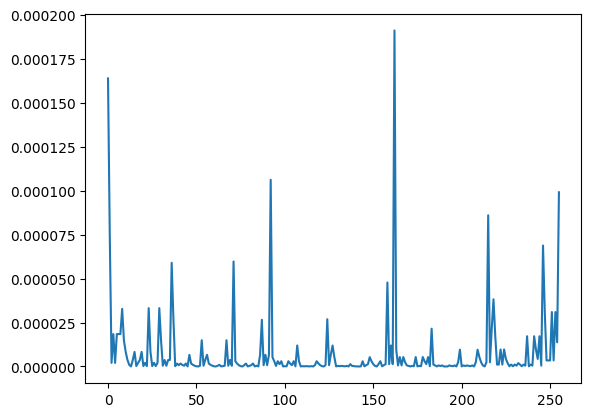

 la secuencia oculta mas probable es de la forma [[1 1 1 1 0 0 0 0]] con una probabilidad de [0.0001911]
el estado [0 0 0 0 0 0 0 0] tiene una probabilidad de 0.13698241367042568
el estado [0 0 0 0 0 0 0 1] tiene una probabilidad de 0.041149206196454416
el estado [0 0 0 0 0 0 1 0] tiene una probabilidad de 0.034737299592422416
el estado [0 0 0 0 0 1 0 0] tiene una probabilidad de 0.03175272356682242
el estado [0 0 0 0 1 0 0 0] tiene una probabilidad de 0.03026766308682242
el estado [0 0 0 1 0 0 0 0] tiene una probabilidad de 0.02932287908682242
el estado [0 0 1 0 0 0 0 0] tiene una probabilidad de 0.02830811108682242
el estado [0 1 0 0 0 0 0 0] tiene una probabilidad de 0.02656789412682242
el estado [1 0 0 0 0 0 0 0] tiene una probabilidad de 0.022978176955622414
el estado [0 0 0 0 0 0 1 1] tiene una probabilidad de 0.018705156764697608
el estado [0 0 0 0 0 1 0 1] tiene una probabilidad de 0.01330001615669761
el estado [0 0 0 0 0 1 1 0] tiene una probabilidad de 0.01467809278056961
el 

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement
States = np.array([0,1]) # Deben ser enteros 
Prior =  np.array([0.2,0.8])
T = np.array([[0.8,0.2],[0.2,0.8]])

E = np.array([[0.5,0.9],[0.5,0.1]])
DictH = {0:'justa',1:'sesgada'} 
DictO = {0:'cara',1:'sello'}
Obs = np.array([1,0,0,0,1,0,1,0])
def GetStates(States,N):
    
    CStates = list( combinations_with_replacement(States,N) )
    
    Permu = []
    
    for it in CStates:
        p = list(permutations(it,N))
       # print(p)
        
        for i in p:
            if i not in Permu:
                Permu.append(i)
                
    return np.array(Permu)
HiddenStates = GetStates(States,8)
def GetProb(T,E,Obs,State,Prior):
    
    n = len(Obs)
    p = 1.
    
    p *= Prior[State[0]]
    
    # Matriz de transicion
    for i in range(n-1):
        p *= T[ State[i+1], State[i]  ]
        
    for i in range(n):
        p *= E[ Obs[i], State[i] ]
        
    return p
P = np.zeros(HiddenStates.shape[0], dtype=np.float64)
for i in range(P.shape[0]):
    P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)
plt.plot(P)
plt.show()
ii = np.where( P == np.amax(P))
print(f' la secuencia oculta mas probable es de la forma {HiddenStates[ii]} con una probabilidad de {P[ii]}')
ObsStates = GetStates([0,1],8)
Nobs = ObsStates.shape[0]

PObs = np.zeros(Nobs)

for j in range(Nobs):
    
    dim = HiddenStates.shape[0]
    P = np.zeros(dim)
    
    for i in range(dim):
        P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)
    PObs[j] = np.sum(P)
    print(f'El estado observable {ObsStates[j]} tiene una probabilidad de {PObs[j]}')

print(f'c)la suma de todos los estados observables es:{np.sum(PObs)}')
print('el resultado depende en gran medida de la probabilidad a-prioir')

Ejercicios: Mínimos cuadrados:1b

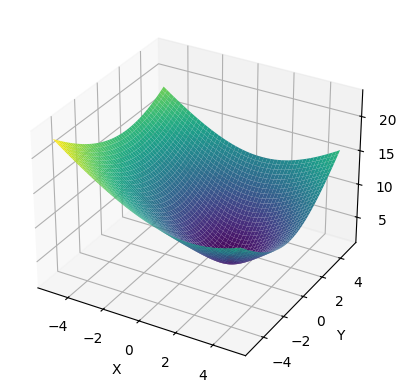

La menor distancia es 2.5354683985409867 en el punto (1.429999999999863, 0.42999999999988425)


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f1(x, y):
    return 2*x - y - 2

def f2(x, y):
    return x + 2*y - 1

def f3(x, y):
    return x + y - 4

def distancia(f1, f2, f3):
    return np.sqrt(f1**2 + f2**2 + f3**2)

x = np.arange(-5, 5, 0.01)
y = np.arange(-5, 5, 0.01)
x, y = np.meshgrid(x, y)

dist = distancia(f1(x, y), f2(x, y), f3(x, y))

minimo = np.unravel_index(np.argmin(dist, axis=None), dist.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, dist, cmap='viridis')
ax.scatter(x[minimo], y[minimo], dist[minimo], color='r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Distancia')
plt.show()

print(f"La menor distancia es {dist[minimo]} en el punto ({x[minimo]}, {y[minimo]})")


Ejercicios: Mínimos cuadrados:7

In [42]:
import numpy as np

b = np.array([-3., -3., 8., 9.])
u1 = np.array([3., 1., 0., 1.])
u2 = np.array([1., 2., 1., 1.])
u3 = np.array([-1., 0., 2., -1.])

U = np.column_stack((u1, u2, u3))

Q = np.zeros(U.shape)

for i in range(U.shape[1]):
    qi = U[:, i]
    for j in range(i):
        qi -= np.dot(Q[:, j], U[:, i]) * Q[:, j]
    Q[:, i] = qi / np.linalg.norm(qi)

c = Q.T @ b

pW_b = Q @ c

print("La proyección ortogonal de b sobre W es: ", pW_b)


La proyección ortogonal de b sobre W es:  [-2.00000000e+00  3.00000000e+00  4.00000000e+00 -1.91900949e-16]
